In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 3 * matplotlib.rcParams['savefig.dpi']
from matplotlib import pyplot as plt

In [2]:
import os
import re
import pandas as pd
import time
import datetime
import sqlite3
import numpy as np

In [3]:
import zipfile
import cabi_Func as cf

In [4]:
reload(cf)

<module 'cabi_Func' from 'cabi_Func.pyc'>

In [ ]:
'''
def read_TH_zipLogFile(zipsDir,dbName):
    fileDB = os.path.join(zipsDir,dbName+'.db')
    (yearsCovered,monthsCovered)=([],[])
    fileLOG = re.sub(r'\.db\Z','.log',fileDB)
    print(fileLOG)
    if (os.path.isfile(fileLOG)):
        with open(fileLOG,'r') as f:
            for line in f.readlines():
                line=line.rstrip()
                print(line)
                if (len(line)==6):
                    monthsCovered.append(line)
                elif (len(line)==4):
                    yearsCovered.append(line)
    return (yearsCovered,monthsCovered)
'''

In [5]:
zipsDir = 'C:\\Users\\rek\\Desktop\\tempCabi2019\\zips20190109'


In [ ]:
[cfm_F,cfm_B] = cf.get_cabiFieldMatcher()
(yearsCovered,monthsCovered) = cf.read_TH_zipLogFile(zipsDir,dbName)
cabiZipFiles = filter(lambda x: x.endswith('-capitalbikeshare-tripdata.zip'),os.listdir(zipsDir))

In [ ]:
#cf.TH_zips2db(zipsDir,dbName,tableName)
th = pd.read_csv(os.path.join(zipsDir,'2010-capitalbikeshare-tripdata.csv'))
cols = th.columns
for col0 in cols:
    col = re.sub('[^a-z]+', '', col0.lower())
    if (col in cfm_B):
        FN = cfm_B[col]
        if FN in cf.fN_TH():
            print('        Processing field: %s' % FN)
            th = th.rename(columns = {col0:FN})
            th[FN] = cf.reformatCabiField(th[FN],FN)

In [ ]:
tStr = '%Y-%m-%d %H:%M:%S'
idata = th[FN]
%timeit qwe = [time.mktime(datetime.datetime.strptime(x,tStr).timetuple()) for x in idata]


In [5]:
zipsDir = 'C:\\Users\\rek\\Desktop\\tempCabi2019\\zips20190109'
cabiZipFiles = filter(lambda x: x.endswith('-capitalbikeshare-tripdata.zip'),os.listdir(zipsDir))
print(cabiZipFiles)

['2010-capitalbikeshare-tripdata.zip', '2011-capitalbikeshare-tripdata.zip', '2012-capitalbikeshare-tripdata.zip', '2013-capitalbikeshare-tripdata.zip', '2014-capitalbikeshare-tripdata.zip', '2015-capitalbikeshare-tripdata.zip', '2016-capitalbikeshare-tripdata.zip', '2017-capitalbikeshare-tripdata.zip', '2018-capitalbikeshare-tripdata.zip']


In [6]:
df0 = pd.DataFrame({'Duration':[],'Start date':[],'End date':[],'Start station number':[],
                   'Start station':[],'End station number':[],'End station':[],'Bike number':[],'Member type':[]})

In [7]:
df0

,Bike number,Duration,End date,End station,End station number,Member type,Start date,Start station,Start station number


In [8]:
len(df0)

0

In [9]:
# Takes 1 minute to open, raw read, and concat all the CSV files:
print(time.ctime())
allFieldNames = set()
numCols = []
#DF = df0
L_df=[]
len_df=[]
for ff in cabiZipFiles:
    zf=zipfile.ZipFile(os.path.join(zipsDir,ff))
    zipContents = filter(lambda x: x.endswith('.csv'),zf.namelist())
    for csvfile in zipContents:
        print('reading %s' % csvfile)
        # previously we verified that all files have the same format:
        #allFieldNames.update(df.columns)
        #numCols.append(len(df.columns))
        L_df.append(pd.read_csv(zf.open(csvfile)))
        len_df.append(len(L_df[-1]))
print(time.ctime())
DF = pd.concat(L_df,ignore_index=True)
print(time.ctime())

Wed Jun 05 10:46:37 2019
reading 2010-capitalbikeshare-tripdata.csv
reading 2011-capitalbikeshare-tripdata.csv
reading 2012Q1-capitalbikeshare-tripdata.csv
reading 2012Q2-capitalbikeshare-tripdata.csv
reading 2012Q3-capitalbikeshare-tripdata.csv
reading 2012Q4-capitalbikeshare-tripdata.csv
reading 2013Q1-capitalbikeshare-tripdata.csv
reading 2013Q2-capitalbikeshare-tripdata.csv
reading 2013Q3-capitalbikeshare-tripdata.csv
reading 2013Q4-capitalbikeshare-tripdata.csv
reading 2014Q1-capitalbikeshare-tripdata.csv
reading 2014Q2-capitalbikeshare-tripdata.csv
reading 2014Q3-capitalbikeshare-tripdata.csv
reading 2014Q4-capitalbikeshare-tripdata.csv
reading 2015Q1-capitalbikeshare-tripdata.csv
reading 2015Q2-capitalbikeshare-tripdata.csv
reading 2015Q3-capitalbikeshare-tripdata.csv
reading 2015Q4-capitalbikeshare-tripdata.csv
reading 2016Q1-capitalbikeshare-tripdata.csv
reading 2016Q2-capitalbikeshare-tripdata.csv
reading 2016Q3-capitalbikeshare-tripdata.csv
reading 2016Q4-capitalbikeshare-tr

In [10]:
len(DF)

22660327

In [11]:
DF.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
22660322,3313,2018-12-31 23:37:22,2019-01-01 00:32:36,31615,6th & H St NE,31624,North Capitol St & F St NW,W00159,Member
22660323,888,2018-12-31 23:42:18,2018-12-31 23:57:07,31618,4th & East Capitol St NE,31509,New Jersey Ave & R St NW,W22026,Member
22660324,2332,2018-12-31 23:44:23,2019-01-01 00:23:16,31907,Franklin & S Washington St,32406,Fleet St & Waterfront St,W23900,Member
22660325,307,2018-12-31 23:52:42,2018-12-31 23:57:50,31114,18th St & Wyoming Ave NW,31103,16th & Harvard St NW,W00761,Member
22660326,1062,2018-12-31 23:54:09,2019-01-01 00:11:52,31110,20th St & Florida Ave NW,31014,Lynn & 19th St North,W21324,Member


In [12]:
# How many unique stations are there?
print(time.ctime())
print(DF['Start station'].nunique(),DF['Start station number'].nunique(),
      DF['End station'].nunique(),DF['End station number'].nunique())
print(time.ctime())

Wed Jun 05 10:47:32 2019
(544, 530, 544, 530)
Wed Jun 05 10:47:35 2019


In [ ]:
# We see a bunch of rows that are listed twice, both in the Nov18 and the Dec18 csv files
    # Any ride that started after 20181201@0000 and completed before 20181204@103308 is included in both files
    # Not sure why there is an overlap here (It does not happen for any other month)
# A naive DeDuping removes most of these duplicates, but not all
    # because some of the station names are changed from one file to the next
        # e.g. 
            # 31232:   "8th & F St NW / National Portrait Gallery" in Nov,  "7th & F St NW / National Portrait Gallery" in Dec
            # 31040:   "Fairfax Dr & Kenmore St" in Nov,  "GMU / Fairfax Dr & Kenmore St" in Dec

            
# DF.drop_duplicates(keep='last',inplace=True)


In [13]:
# 1 minute for de-dupe:

# Ah, but you can use the 'subset' argument within dedupe!!!
    # we want to use all columns except ignore the two station name columns
        # that should take care of the station renaming problem
            # We'll keep the most recent station name
    
subset4dedupe = [col for col in DF.columns if ((col != 'Start station') and (col != 'End station'))]
print(time.ctime())
print(len(DF))
DF.drop_duplicates(subset=subset4dedupe,keep='last',inplace=True)
print(len(DF))
print(time.ctime())

                    # Aside: it is troubling that some of the historical "renames" are actually entirely different locations
                        # e.g. the original station at the 34th St S bridge over 395 got renamed to "4MR and Walter Reed"
                                # even though those locations are not too close to one another
                            # i'm guessing the new dock at 4MR & WR has the same ID number as the previous dock at 34th St S
                                        # and that the new name is getting propagated back mistakenly 
                        # Look into this further in a bit
                            # May require comparison vs. my old data that was downloaded from CaBi three years ago
                            # Presumably there exist other extinct stations that are similarly treated

Wed Jun 05 10:47:35 2019
22660327
22641648
Wed Jun 05 10:48:23 2019


In [14]:
len(DF)

22641648

In [15]:

# Inspection shows two early-Dec rows from the November file that did NOT get dropped during this dedupe.
    # Thus they appear as out-of-order chronologically
# DF.iloc[22482790:22482800]
    # rows with indices 22500359 and 22501298 did NOT get dropped
# Here is the first example
    # (first row), along with two related rows from the December CSV file:
interestingRideIDs = [22500359,22519048,22519640]
(DF.loc[interestingRideIDs])

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
22500359,2806,2018-12-04 08:22:12,2018-12-04 09:08:59,31644,12th St & Pennsylvania Ave SE,31624,North Capitol St & F St NW,W00662,Member
22519048,349,2018-12-04 08:22:12,2018-12-04 08:28:02,31644,12th St & Pennsylvania Ave SE,31605,3rd & D St SE,W00662,Member
22519640,571,2018-12-04 08:59:28,2018-12-04 09:08:59,31605,3rd & D St SE,31624,North Capitol St & F St NW,W00662,Member


In [16]:
# And the second example:
# Same thing happened again the next hour, also at 3rd & D St SE:
interestingRideIDs = [22501298,22520005,22520121]
(DF.loc[interestingRideIDs])

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
22501298,2099,2018-12-04 09:39:44,2018-12-04 10:14:44,31641,2nd St & Massachusetts Ave NE,31644,12th St & Pennsylvania Ave SE,W23016,Member
22520005,369,2018-12-04 09:39:44,2018-12-04 09:45:54,31641,2nd St & Massachusetts Ave NE,31605,3rd & D St SE,W23016,Member
22520121,424,2018-12-04 10:07:40,2018-12-04 10:14:44,31605,3rd & D St SE,31644,12th St & Pennsylvania Ave SE,W23016,Member


In [17]:
# Why?
    # It looks like station 31605 "3rd & D St SE" may have failed to communicate during this period.
    # In each case, the end-Nov file shows a single ride that the Dec file has resolved into two rides !!!!!!!!!!
        # Presumably the software didn't close the initial ride 
            # until someone else eventually came along and dropped the same bike at another station
                # (it does seem likely to have been a different person)
                            # altho the intermediate station is located somewhat between the two endpoints in each case,
                                # there is a large time gap in both cases. in both cases, time gap is longer than either ride

# Aside: we could check to see if there are any other rides involving 3rd & D St SE during this period?

In [22]:
# So one obvious way to detect this sort of data error: 
                # check for any bicycle that is engaged in more than one trip at a time
# All rides, when sorted by start time, should close out before any new trip involving that bicycle begins

    # If we Create a separate itinerary for each bike, It shouldn't have overlaps between rides

'''
uB = DF['Bike number'].unique()
numBikes = len(uB)
print(uB)
print(numBikes)
overlaps = []
print(time.ctime())
'''
# WAY TOO SLOW
    # probably because it is filtering thru the tripHistory dataframe for each bike separately !!
        # so the full loop is probably O(numBikes * numTripsTotal) for this filtering
            # the actual processing should be O(numTripsTotal)
'''
for dex in range(numBikes):
    localOverlaps=0
    if (dex%200 == 0):
        print('%d / %d' % (dex,numBikes))
    itinerary = DF[DF['Bike number']==uB[dex]].sort_values(by='Start date')
    for row in range(len(itinerary)-1):
        if (itinerary.iloc[row]['End date'] > itinerary.iloc[row+1]['Start date']):
            localOverlaps+=1
    overlaps.append(localOverlaps)
print(time.ctime())
'''

"\nfor dex in range(numBikes):\n    localOverlaps=0\n    if (dex%200 == 0):\n        print('%d / %d' % (dex,numBikes))\n    itinerary = DF[DF['Bike number']==uB[dex]].sort_values(by='Start date')\n    for row in range(len(itinerary)-1):\n        if (itinerary.iloc[row]['End date'] > itinerary.iloc[row+1]['Start date']):\n            localOverlaps+=1\n    overlaps.append(localOverlaps)\nprint(time.ctime())\n"

In [ ]:
# Let's figure out how to do this with a single groupby operation instead
    # pandas get_group appears to do exactly what i need
    
'''
uB = DF['Bike number'].unique()
numBikes = len(uB)
print(uB)
print(numBikes)
overlaps = []

print(time.ctime())
gb_Bike = DF.groupby('Bike number')
print(time.ctime())
for bDex in range(numBikes):
    localOverlaps=0
    if (bDex%1000 == 0):
        print('%d / %d' % (bDex,numBikes))
    itinerary = gb_Bike.get_group(uB[bDex]).sort_values(by='Start date')
    wgho=bDex**2
    (SD,ED) = (list(itinerary['Start date']),list(itinerary['End date']))
    #print(SD)
    for row in range(len(SD)-1):
        if (ED[row] > SD[row+1]):
        #if (itinerary['End date'].iloc[row] > itinerary['Start date'].iloc[row+1]):
            localOverlaps+=1
    overlaps.append(localOverlaps)
print(time.ctime())
# Weird: this indexing into itinerary was taking forever for some reason.
        # but it's much faster if you just write the needed columns to lists and then do the overlap check. (Why?)
'''


In [18]:
# ~ 1 minute:
# Find all overlaps (conflicts within a single bike's itinerary) => overlapDF

uB = DF['Bike number'].unique()
numBikes = len(uB)
print(uB)
print(numBikes)
overlaps = []
overlapDF = pd.DataFrame({'Duration':[],'Start date':[],'End date':[],'Start station number':[],
                   'Start station':[],'End station number':[],'End station':[],'Bike number':[],'Member type':[]})

print(time.ctime())
gb_Bike = DF.groupby('Bike number')
print(time.ctime())
for bDex in range(numBikes):
    localOverlaps=0
    if (bDex%1000 == 0):
        print('%d / %d' % (bDex,numBikes))
    itinerary = gb_Bike.get_group(uB[bDex]).sort_values(by='Start date')
    (SD,ED) = (list(itinerary['Start date']),list(itinerary['End date']))
    #print(SD)
    for row in range(len(SD)-1):
        if (ED[row] > SD[row+1]):
        #if (itinerary['End date'].iloc[row] > itinerary['Start date'].iloc[row+1]):
            localOverlaps+=1
            overlapDF = pd.concat([overlapDF,itinerary.iloc[row:(row+2)]])
    overlaps.append(localOverlaps)
print(time.ctime())
print(len(overlaps)) # actually this is just the number of unique bikes
print(sum(overlaps))

['W00742' 'W00032' 'W00993' ..., 'W24122' 'W24101' 'W24125']
5688
Wed Jun 05 10:49:08 2019
Wed Jun 05 10:49:08 2019
0 / 5688
1000 / 5688
2000 / 5688
3000 / 5688
4000 / 5688
5000 / 5688
Wed Jun 05 10:50:02 2019
5688
40


In [19]:
len(overlapDF)

80

In [20]:
# Inspection of the overlaps shows that, except for those two cases involving the 3rd & D station on 20181204
    # all the rest occur during the DST overlap hour each year in November
            # and so are presumably caused by timestamp indistinguishability having led to an incorrect sort order
        # Cool !
#overlapDF.tail(42)
#overlapDF.head(42)

# Let's remove all the ones that coincide with November FallBacks:

fallbackDates = [20101107,20111106,20121104,20131103,20141102,20151101,20161106,20171105,20181104,20191103,20201101]
fallbackStrings = [('%04d-%02d-%02d 01:' % (day//10000,(day//100)%100,day%100)) for day in fallbackDates]

dysclosureAnomalies = \
            overlapDF[(overlapDF['Start date'].apply(lambda x: not(any([x.startswith(s) for s in fallbackStrings])))) & \
                (overlapDF['End date'].apply(lambda x: not(any([x.startswith(s) for s in fallbackStrings]))))]

print(len(dysclosureAnomalies))

# Only the six rows from our "interestingRideIDs" remain!
        # [22500359,22519048,22519640,22501298,22520005,22520121]

6


In [21]:
# dysclosureAnomalies
    # Note that it matters how the rows with identical end times were arbitrarily sorted.
        # In the first case, we never see the second leg (trip from 3rd & D to N.Cap & F) appear in our overlapDF
            # because the rows had been sorted as (full dysclosed, then correct first leg, then correct second leg)
                    # order of the first two is arbitrary since they have identical start times
                # the first pair of entries produces an overlap error, but the second pair of consecutive entries does not 
        # In the second case, it appears as two overlaps 
            # because the rows had been sorted as (correct first leg, full dysclosed, correct second leg)
                # so each pair of successive entries produces an overlap error
                
# Regardless it is possible to identify the two dysclosed ride IDs, even without all the correct legs present
    # If any two rides match all of ['Bike number','Start date','Start station number']
        # then the longer ride should be discarded
        
keepSet = set(dysclosureAnomalies.groupby(['Bike number','Start date','Start station number'])['Duration'].idxmin())
                                                            # remember 'Start date' is the full timestamp, not just the day!!
    # If any rows match all of the above (same bike, same start location/timestamp)
            # then we are going to remove the longest duration ride.
discardSet = set(dysclosureAnomalies.index) - keepSet
print(len(DF))
DF.drop(list(discardSet),axis=0,inplace=True)
print(len(DF))
# takes a few seconds

# The two dysclosed trips have been discarded.
# The only known timestamp issue remaining is the fallback ambiguity

22641648
22641646


In [22]:
# Jan 2016 snowstorm: All bicycles remained checked into the system during the Snowzilla. No rides for almost five days.
print((DF['Start date'] < '2016-01-22 19:10').sum())
print((DF['Start date'] < '2016-01-27 15:43').sum())
print((DF['End date'] < '2016-01-22 19:10').sum())
print((DF['End date'] < '2016-01-27 15:43').sum())

12137199
12137199
12137199
12137199


In [26]:
print(sorted(uB))

['23750', '23751', '23752', '23753', '23754', '23755', '23756', '23757', '51020', '51033', '51045', '65005', '65009', '65012', '65013', '65033', '65038', '65043', '70004', '70011', '70015', '70029', '70031', '70047', '70049', '70059', '70063', '70064', '70079', '70087', '70094', '70105', '70138', '70142', '70151', '70159', '70172', '70174', '70176', '70180', '70203', '70231', '70232', '70241', '?(0x0000000008D291C0)', '?(0x000000000CB3A1A6)', '?(0x000000000D11CC6B)', '?(0x000000001A4D699F)', '?(0x0000000026B3BBA8)', '?(0x000000002FD1067B)', '?(0x000000003EB026B9)', '?(0x000000004443704F)', '?(0x000000004752DD3A)', '?(0x000000005F128A5C)', '?(0x000000006945F6DC)', '?(0x000000006DFB8596)', '?(0x0000000074BEBCE4)', '?(0x000000007C120F6A)', '?(0xFFFFFFFF83DE3658)', '?(0xFFFFFFFF9A5FEA16)', '?(0xFFFFFFFFAAC5A4C0)', '?(0xFFFFFFFFADC1C69A)', '?(0xFFFFFFFFB44D36A5)', '?(0xFFFFFFFFE74EA88B)', '?(0xFFFFFFFFEB7B5641)', '?(0xFFFFFFFFEB8D4246)', '?(0xFFFFFFFFEBA95C18)', '?(0xFFFFFFFFEE8DADF1)', '?(

In [26]:
# It would be nice to have numeric format for the timestamps. The conversion takes a while though!
    # Looks like time.mktime can convert 80000 timestamps per second
    # so it should take ten minutes to do 45M

In [23]:
DF.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [24]:
# Takes 10 minutes to convert 45M strings timestamps into floats!

tStr = '%Y-%m-%d %H:%M:%S'
print(time.ctime())
DF['Start time'] = DF['Start date'].apply(lambda x: time.mktime(datetime.datetime.strptime(x,tStr).timetuple()))
print(time.ctime())
DF['End time'] = DF['End date'].apply(lambda x: time.mktime(datetime.datetime.strptime(x,tStr).timetuple()))
print(time.ctime())

Wed Jun 05 10:50:52 2019
Wed Jun 05 10:56:03 2019
Wed Jun 05 11:01:14 2019


In [25]:
DF.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start time,End time
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,1.284996e+09,1.284997e+09
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,1.284997e+09,1.284997e+09
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,1.284999e+09,1.285001e+09
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,1.284999e+09,1.285000e+09
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,1.284999e+09,1.285000e+09


In [ ]:
DF['End time'].dtype

In [27]:
pwd

u'C:\\Users\\rek\\Desktop\\GH\\cabi'

In [5]:
def rek_writeSQL(dbName,tableName,DF,wa,index=True):
    myConnection = sqlite3.connect(dbName)
    try:
        if (wa=='w'):
            DF.to_sql(tableName,myConnection,if_exists='replace',index=index)    
        elif (wa=='a'):
            DF.to_sql(tableName,myConnection,if_exists='append',index=index)
    except:
        print('error with rek_writeSQL')
    myConnection.close()
    
def rek_readSQL(dbName,tableName):
    myConnection = sqlite3.connect(dbName)
    try:
        tableDF = pd.read_sql("SELECT * FROM "+tableName,myConnection)
    except:
        tableDF = []
    myConnection.close()
    return tableDF

In [29]:
# Takes 2.5 minutes to write Trip History to sql DB:

dbName = 'C:\\Users\\rek\\Desktop\\tempCabi2019\\db\\cabi_20190605.db'
tableName = 'TH'
print(time.ctime())
tableName = 'TH_i1'
rek_writeSQL(dbName,tableName,DF,'w',index=True)
print(time.ctime())
tableName = 'TH_i0'
rek_writeSQL(dbName,tableName,DF,'w',index=False)
print(time.ctime())

Wed Jun 05 12:16:07 2019


C:\Users\rek\Desktop\sw\Anaconda\lib\site-packages\pandas\core\generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


Wed Jun 05 12:18:33 2019
Wed Jun 05 12:20:28 2019


In [6]:
# Read TH from database (2 minutes):
dbName = 'C:\\Users\\rek\\Desktop\\tempCabi2019\\db\\cabi_20190605.db'
tableName = 'TH'
print(time.ctime())
DF65i1 = rek_readSQL(dbName,'TH_i1')
print(time.ctime())
DF65i0 = rek_readSQL(dbName,'TH_i0')
print(time.ctime())

Wed Jun 12 11:42:24 2019
Wed Jun 12 11:44:27 2019
Wed Jun 12 11:46:35 2019


In [41]:
print(len(DF))
print(len(DF65i1))
print(len(DF65i0))
print(DF65i1.shape)
print(DF65i0.shape)
#print(DF==DF63) actually this gives a ValueError: 

    # can only compare identically labeled DataFrame objects
    
    # DF63 has an "index" column added ...
#print(DF==DF65i0) 
    # but this still doesn't work either
    
# perhaps it's because the index values changed. Original DeDuping did not re-number rows.
#print(DF.tail(2))
#print(DF65i0.tail(2))

all(DF.loc[22660325] == DF65i0.loc[22641644])


22641646
22641646
22641646
(22641646, 12)
(22641646, 11)


True

In [39]:
DF63.head()

,index,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start time,End time
0,0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,1.284996e+09,1.284997e+09
1,1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,1.284997e+09,1.284997e+09
2,2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,1.284999e+09,1.285001e+09
3,3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,1.284999e+09,1.285000e+09
4,4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,1.284999e+09,1.285000e+09


In [ ]:
DF.iloc[19536692:19536694]

In [ ]:
print(DF.loc[22312349:22312351,['Start date','Start time']])
print(DF.loc[19536692:19536694,['Start date','Start time']])

In [ ]:
print(DF['Start time'].iloc[22312350]-DF['Start time'].iloc[22312349])
print(DF['Start time'].iloc[19536693]-DF['Start time'].iloc[19536692])
# Nov: python automatically assumes that anything listed in the 1am hour is EST, but anything before is EDT
# Mar: python automatically assumes that 3am is EDT, 1am is EST. So only 5.5 minutes between timestamps 01:56:38 and 03:02:09

# i.e. it automatically includes and accounts for DST in its computations of a unix time stamp

In [10]:
# Okay enough of that
# If reading from DB, we will want to move the data into variable 'DF':
DF=DF65i0

In [11]:
pwd

u'C:\\Users\\rek\\Desktop\\GH\\cabi'

In [12]:
W = pd.read_csv('KDCA_mesowest_2010-2018.csv',header=6,skiprows=[7])

C:\Users\rek\Desktop\sw\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,27,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
W.head(10)

,Station_ID,Date_Time,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,...,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,pressure_set_1d,sea_level_pressure_set_1d,heat_index_set_1d,weather_condition_set_1d,Unnamed: 38,Unnamed: 39
0,KDCA,12/30/2009 03:52 EST,30.50,24.08,NaN,51.83,3.44,340.0,NaN,NaN,...,NaN,8.74,NaN,NNW,30.49,30.50,NaN,Clear,NaN,NaN
1,KDCA,12/30/2009 04:52 EST,30.51,24.08,NaN,51.83,3.44,290.0,NaN,NaN,...,NaN,8.74,NaN,WNW,30.50,30.51,NaN,Mostly Cloudy,NaN,NaN
2,KDCA,12/30/2009 05:52 EST,30.52,24.08,NaN,51.83,4.61,280.0,NaN,NaN,...,NaN,8.74,NaN,W,30.51,30.52,NaN,Overcast,NaN,NaN
3,KDCA,12/30/2009 06:52 EST,30.52,24.08,NaN,54.41,8.05,340.0,NaN,NaN,...,NaN,9.83,17.77,NNW,30.51,30.52,NaN,Overcast,NaN,NaN
4,KDCA,12/30/2009 07:52 EST,30.52,24.98,NaN,52.40,8.05,330.0,NaN,NaN,...,NaN,9.82,18.83,NNW,30.51,30.52,NaN,Overcast,NaN,NaN
5,KDCA,12/30/2009 08:52 EST,30.51,26.96,NaN,48.27,0.00,0.0,NaN,NaN,...,NaN,9.81,NaN,N,30.50,30.51,NaN,Overcast,NaN,NaN
6,KDCA,12/30/2009 09:52 EST,30.52,28.04,NaN,46.16,3.44,80.0,NaN,NaN,...,NaN,9.80,NaN,E,30.51,30.52,NaN,Overcast,NaN,NaN
7,KDCA,12/30/2009 10:52 EST,30.53,28.94,NaN,48.60,4.61,170.0,NaN,NaN,...,NaN,11.79,NaN,S,30.52,30.53,NaN,Overcast,NaN,NaN
8,KDCA,12/30/2009 11:52 EST,30.49,30.02,NaN,44.32,6.91,170.0,NaN,NaN,...,NaN,10.69,NaN,S,30.48,30.49,NaN,Overcast,NaN,NaN
9,KDCA,12/30/2009 12:52 EST,30.47,30.02,NaN,48.40,8.05,180.0,NaN,NaN,...,NaN,12.69,24.75,S,30.46,30.47,NaN,Overcast,NaN,NaN


In [14]:
W.shape

(355730, 40)

In [15]:
W.columns

Index([u'Station_ID', u'Date_Time', u'altimeter_set_1', u'air_temp_set_1',
       u'dew_point_temperature_set_1', u'relative_humidity_set_1',
       u'wind_speed_set_1', u'wind_direction_set_1', u'wind_gust_set_1',
       u'snow_depth_set_1', u'sea_level_pressure_set_1',
       u'weather_cond_code_set_1', u'cloud_layer_3_code_set_1',
       u'pressure_tendency_set_1', u'precip_accum_one_hour_set_1',
       u'precip_accum_three_hour_set_1', u'cloud_layer_1_code_set_1',
       u'cloud_layer_2_code_set_1', u'precip_accum_six_hour_set_1',
       u'precip_accum_24_hour_set_1', u'visibility_set_1',
       u'metar_remark_set_1', u'metar_set_1', u'air_temp_high_6_hour_set_1',
       u'air_temp_low_6_hour_set_1', u'peak_wind_speed_set_1',
       u'ceiling_set_1', u'pressure_change_code_set_1',
       u'air_temp_high_24_hour_set_1', u'air_temp_low_24_hour_set_1',
       u'peak_wind_direction_set_1', u'dew_point_temperature_set_1d',
       u'wind_chill_set_1d', u'wind_cardinal_direction_set_1d',


In [16]:
for col in W.columns:
    print('%s:    %s' % (col,W[col].dtype))

Station_ID:    object
Date_Time:    object
altimeter_set_1:    float64
air_temp_set_1:    float64
dew_point_temperature_set_1:    float64
relative_humidity_set_1:    float64
wind_speed_set_1:    float64
wind_direction_set_1:    float64
wind_gust_set_1:    float64
snow_depth_set_1:    float64
sea_level_pressure_set_1:    float64
weather_cond_code_set_1:    float64
cloud_layer_3_code_set_1:    float64
pressure_tendency_set_1:    float64
precip_accum_one_hour_set_1:    float64
precip_accum_three_hour_set_1:    float64
cloud_layer_1_code_set_1:    float64
cloud_layer_2_code_set_1:    float64
precip_accum_six_hour_set_1:    float64
precip_accum_24_hour_set_1:    float64
visibility_set_1:    float64
metar_remark_set_1:    float64
metar_set_1:    object
air_temp_high_6_hour_set_1:    float64
air_temp_low_6_hour_set_1:    float64
peak_wind_speed_set_1:    float64
ceiling_set_1:    float64
pressure_change_code_set_1:    object
air_temp_high_24_hour_set_1:    float64
air_temp_low_24_hour_set_1: 

In [17]:
# Unnamed columns 38 and 39 appear to be spillovers from weather_condition_set_1d
    # Perhaps the data entered are supposed to be comma-separated strings all in one cell
        # Example, row 652
                # Looks like mixed precipitation falling into three columns, probably unintentional
W.iloc[652,[0,1,37,38,39]]

Station_ID                                  KDCA
Date_Time                   01/21/2010 20:16 EST
weather_condition_set_1d              Light Rain
Unnamed: 38                           Light Snow
Unnamed: 39                    Light Ice Pellets
Name: 652, dtype: object

In [18]:
print(W.weather_condition_set_1d.unique())
print(W['Unnamed: 38'].unique())
print(W['Unnamed: 39'].unique())

# unique() appears to sort its entries by order of their first appearance in the pandas Series

['Clear' 'Mostly Cloudy' 'Overcast' 'Light Frz Rain' 'Light Rain' 'Mist'
 'Partly Cloudy' 'Mostly Clear' 'Light Snow' 'Snow' 'Rain' 'Heavy Rain'
 'Light Drizzle' 'Light Ice Pellets' 'Heavy Snow' 'Haze' 'Frz Rain'
 'Light Frz Drizzle' 'Thunderstorm' 'Heavy Rain/Thunderstorm' 'Thunder'
 'Light Rain/Thunderstorm' 'Fog' 'Squalls' 'Ice pellets' nan 'Blowing Snow'
 'Unknown Precip' 'Ice Fog' 'Heavy Ice Pellets']
[nan 'Light Ice Pellets' 'Mist' 'Ice Fog' 'Light Snow' 'Light Rain' 'Fog'
 'Blowing Snow' 'Snow' 'Haze' 'Hail' 'Squalls' 'Ice pellets' 'Rain'
 'Heavy Hail' 'Heavy Rain']
[nan 'Mist' 'Light Snow' 'Light Ice Pellets' 'Rain' 'Squalls' 'Fog'
 'Blowing Snow' 'Ice pellets' 'Ice Fog']


In [19]:
W.groupby('weather_condition_set_1d').Station_ID.count().sum()
# 19514 rows have no weather condition listed at all
    # These rows are ignored by groupby !!!

336216L

In [20]:
(W[W.weather_condition_set_1d.isnull()]).shape

(19514, 40)

In [21]:
(W[W.weather_condition_set_1d.isnull()]).head()

,Station_ID,Date_Time,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,...,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,pressure_set_1d,sea_level_pressure_set_1d,heat_index_set_1d,weather_condition_set_1d,Unnamed: 38,Unnamed: 39
14681,KDCA,05/13/2011 15:18 EDT,29.84,64.40,NaN,82.65,11.50,150.0,NaN,NaN,...,NaN,58.97,NaN,SSE,29.83,29.81,NaN,NaN,NaN,NaN
24358,KDCA,03/29/2012 01:52 EDT,29.69,69.98,NaN,27.66,12.66,300.0,23.02,NaN,...,NaN,34.99,NaN,WNW,29.68,29.68,NaN,NaN,NaN,NaN
29739,KDCA,10/02/2012 22:52 EDT,29.95,71.06,NaN,93.48,3.44,60.0,NaN,NaN,...,NaN,69.07,NaN,ENE,29.94,29.91,NaN,NaN,NaN,NaN
43108,KDCA,12/25/2013 01:52 EST,30.50,24.98,NaN,47.93,6.91,320.0,NaN,NaN,...,NaN,7.83,NaN,NW,30.49,30.50,NaN,NaN,NaN,NaN
43111,KDCA,12/25/2013 04:52 EST,30.51,23.00,NaN,53.36,11.50,330.0,NaN,NaN,...,NaN,8.39,14.54,NNW,30.50,30.51,NaN,NaN,NaN,NaN


In [22]:
nullTemps = W[W.air_temp_set_1.isnull()]
print(nullTemps.shape)
nullWeatherCondition = W[W.weather_condition_set_1d.isnull()]
print(nullWeatherCondition.shape)

(8015, 40)
(19514, 40)


In [37]:
nullTemps.tail(5)

,Station_ID,Date_Time,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,...,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,pressure_set_1d,sea_level_pressure_set_1d,heat_index_set_1d,weather_condition_set_1d,Unnamed: 38,Unnamed: 39
349424,KDCA,12/11/2018 11:15 EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349431,KDCA,12/11/2018 11:50 EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349433,KDCA,12/11/2018 11:55 EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349437,KDCA,12/11/2018 12:15 EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349440,KDCA,12/11/2018 12:30 EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Objective: Perform QA on Weather Data
    # Gaps: We know that there are gaps in pretty much every field.
        # So imputation will be required. We'll need to "fill in" the gaps.
        # We want to determine whether this is reasonable / how large are the imputation errors likely to be
            # Assuming that the reported data are accurate where they exist, then, we need to know how long the gaps are
                # Some of the gaps are systematic, e.g. certain fields are only reported once every 6 hours
                # Others appear to be missing data: those are the ones most concerning
                # Could be different for every field, so it would be good to look at each field separately

In [24]:
# Necessary First step: time stamp conversion from string to unix float
        

In [25]:
cols1 = ['Station_ID','Date_Time','air_temp_set_1','dew_point_temperature_set_1','relative_humidity_set_1',
    'wind_speed_set_1','wind_gust_set_1','snow_depth_set_1',
    'precip_accum_one_hour_set_1','precip_accum_three_hour_set_1','precip_accum_six_hour_set_1',
    'precip_accum_24_hour_set_1','visibility_set_1','dew_point_temperature_set_1d',
    'wind_chill_set_1d','heat_index_set_1d','weather_condition_set_1d']

# These are the only columns we might be interested in

In [27]:
# usually this is very quick, but one time it took a full minute: ???
print(time.ctime())
W1 = W[cols1]
print(time.ctime())

Wed Jun 12 11:52:29 2019
Wed Jun 12 11:52:29 2019


In [28]:
W1.shape

(355730, 17)

In [29]:
W1.describe()

C:\Users\rek\Desktop\sw\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_gust_set_1,snow_depth_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,visibility_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,heat_index_set_1d
count,347715.000000,46063.000000,347695.000000,347211.000000,21518.000000,328.000000,34316.000000,2182.000000,2897.000000,1087.000000,347695.000000,347695.000000,47809.000000,54270.000000
mean,60.384233,48.229585,65.760091,8.618289,25.634183,4.984756,0.048643,0.080981,0.116307,0.347038,9.379463,47.674293,29.761972,88.921320
std,17.872186,19.104544,19.392811,5.059351,6.245845,5.069826,0.108434,0.184056,0.241684,0.504245,1.875291,19.549313,9.400774,6.156068
min,6.800000,-14.800000,8.730000,0.000000,16.110000,1.000000,0.000000,0.000000,0.000000,0.010000,0.060000,-15.020000,-7.290000,78.520000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,105.080000,80.060000,100.000000,51.790000,70.200000,22.000000,2.630000,2.790000,2.860000,4.000000,10.000000,82.410000,42.300000,121.240000


In [44]:
# pandas describe() is not computing quantiles for columns containing any NaN values... which is every single column
print(pd.__version__)   # 0.18.1
    # i think i saw somewhere that this has been fixed since version 0.18 ?????
        # anyway, I'd rather get this data set wrangled into a solid ML-ready DF before considering any package updates
        
        # so let's try to look at this data manually 

0.18.1


In [45]:
# Takes 15 seconds to convert 355k timestamps
    # about 4x longer, per row, for this conversion, than for the one performed on TripHistory above.
        # Why? Perhaps the string slice [:16] 

tStr = '%m/%d/%Y %H:%M'
print(time.ctime())
W1['timestamp'] = W1.Date_Time.apply(lambda x: time.mktime(datetime.datetime.strptime(x[:16],tStr).timetuple()))
print(time.ctime())

Wed Jun 12 13:20:34 2019
Wed Jun 12 13:20:52 2019


C:\Users\rek\Desktop\sw\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
W1.loc[2235:2242,['Date_Time','timestamp']]

,Date_Time,timestamp
2235,03/14/2010 00:52 EST,1.268546e+09
2236,03/14/2010 01:11 EST,1.268547e+09
2237,03/14/2010 01:49 EST,1.268549e+09
2238,03/14/2010 01:52 EST,1.268550e+09
2239,03/14/2010 03:02 EDT,1.268550e+09
2240,03/14/2010 03:19 EDT,1.268551e+09
2241,03/14/2010 03:42 EDT,1.268553e+09
2242,03/14/2010 03:52 EDT,1.268553e+09


In [54]:
print(time.mktime(datetime.datetime.strptime('03/14/2010 01:02','%m/%d/%Y %H:%M').timetuple())) # assumes EST
print(time.mktime(datetime.datetime.strptime('03/14/2010 01:52','%m/%d/%Y %H:%M').timetuple())) # assumes EST
print(time.mktime(datetime.datetime.strptime('03/14/2010 02:02','%m/%d/%Y %H:%M').timetuple())) # assumes EDT (i.e.===01:02 EST)
                            # altho of course this time 02:02 DNE on a spring-forward day !!!
print(time.mktime(datetime.datetime.strptime('03/14/2010 03:02','%m/%d/%Y %H:%M').timetuple())) # assumes EDT
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:52','%m/%d/%Y %H:%M').timetuple())) # assumes EDT
print(time.mktime(datetime.datetime.strptime('11/07/2010 01:02','%m/%d/%Y %H:%M').timetuple())) # assumes EST !! (second hour)
print(time.mktime(datetime.datetime.strptime('11/07/2010 01:52','%m/%d/%Y %H:%M').timetuple())) # assumes EST
print(time.mktime(datetime.datetime.strptime('11/07/2010 02:02','%m/%d/%Y %H:%M').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 03:02','%m/%d/%Y %H:%M').timetuple()))

# So perhaps it's using my local settings (which are USA Eastern, including DST between 2ndSun-of-March and 1stSun-of-Nov) !!!
print(' ')
# Verify vs Unix times for known time zones:
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:02 Eastern Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:02 Eastern Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:52 Eastern Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:52 Eastern Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 01:02 Eastern Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 01:02 Eastern Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 02:02 Eastern Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 02:02 Eastern Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 03:02 Eastern Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 03:02 Eastern Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 04:02 Eastern Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 04:02 Eastern Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))

1268546520.0
1268549520.0
1268546520.0
1268550120.0
1289105520.0
1289109720.0
1289112720.0
1289113320.0
1289116920.0
 
1289102520.0
1289102520.0
1289105520.0
1289105520.0
1289109720.0
1289109720.0
1289113320.0
1289113320.0
1289116920.0
1289116920.0
1289120520.0
1289120520.0


In [56]:

print(' ')
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:02 Pacific Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:02 Pacific Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:52 Pacific Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 00:52 Pacific Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 01:02 Pacific Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 01:02 Pacific Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 02:02 Pacific Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 02:02 Pacific Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 03:02 Pacific Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 03:02 Pacific Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 04:02 Pacific Daylight Time','%m/%d/%Y %H:%M %Z').timetuple()))
print(time.mktime(datetime.datetime.strptime('11/07/2010 04:02 Pacific Standard Time','%m/%d/%Y %H:%M %Z').timetuple()))

# Weird: why doesn't it recognize "Pacific" (or "Central" for that matter)???

ValueError: time data '11/07/2010 00:02 Pacific Daylight Time' does not match format '%m/%d/%Y %H:%M %Z'

In [57]:
time.strftime('%Z')

'Eastern Daylight Time'

In [67]:
W1.head(5)

,Station_ID,Date_Time,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_gust_set_1,snow_depth_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,visibility_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,heat_index_set_1d,weather_condition_set_1d,timestamp
0,KDCA,12/30/2009 03:52 EST,24.08,NaN,51.83,3.44,NaN,NaN,NaN,NaN,NaN,NaN,10.0,8.74,NaN,NaN,Clear,1.262163e+09
1,KDCA,12/30/2009 04:52 EST,24.08,NaN,51.83,3.44,NaN,NaN,NaN,NaN,NaN,NaN,10.0,8.74,NaN,NaN,Mostly Cloudy,1.262167e+09
2,KDCA,12/30/2009 05:52 EST,24.08,NaN,51.83,4.61,NaN,NaN,NaN,NaN,NaN,NaN,10.0,8.74,NaN,NaN,Overcast,1.262170e+09
3,KDCA,12/30/2009 06:52 EST,24.08,NaN,54.41,8.05,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.83,17.77,NaN,Overcast,1.262174e+09
4,KDCA,12/30/2009 07:52 EST,24.98,NaN,52.40,8.05,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.82,18.83,NaN,Overcast,1.262178e+09


In [124]:
boy10 = time.mktime(datetime.datetime.strptime('01/01/2010 00:00','%m/%d/%Y %H:%M').timetuple())
boy11 = time.mktime(datetime.datetime.strptime('01/01/2011 00:00','%m/%d/%Y %H:%M').timetuple())
boy12 = time.mktime(datetime.datetime.strptime('01/01/2012 00:00','%m/%d/%Y %H:%M').timetuple())
boy13 = time.mktime(datetime.datetime.strptime('01/01/2013 00:00','%m/%d/%Y %H:%M').timetuple())
boy14 = time.mktime(datetime.datetime.strptime('01/01/2014 00:00','%m/%d/%Y %H:%M').timetuple())
boy15 = time.mktime(datetime.datetime.strptime('01/01/2015 00:00','%m/%d/%Y %H:%M').timetuple())
boy16 = time.mktime(datetime.datetime.strptime('01/01/2016 00:00','%m/%d/%Y %H:%M').timetuple())
boy17 = time.mktime(datetime.datetime.strptime('01/01/2017 00:00','%m/%d/%Y %H:%M').timetuple())
boy18 = time.mktime(datetime.datetime.strptime('01/01/2018 00:00','%m/%d/%Y %H:%M').timetuple())
boy19 = time.mktime(datetime.datetime.strptime('01/01/2019 00:00','%m/%d/%Y %H:%M').timetuple())
boy20 = time.mktime(datetime.datetime.strptime('01/01/2020 00:00','%m/%d/%Y %H:%M').timetuple())

In [121]:
boy13

1357016400.0

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.00000000e+00,   2.90000000e+01,   1.15000000e+02,
          2.28000000e+02,   8.21000000e+02,   8.72000000e+02,
          1.44400000e+03,   1.21700000e+03,   8.00000000e+02,
          1.59500000e+03,   1.75800000e+03,   2.44400000e+03,
          4.05800000e+03,   9.98100000e+03,   8.80400000e+03,
          9.32900000e+03,   1.01250000e+04,   5.59000000e+03,
          1.11630000e+04,   1.17150000e+04,   1.20290000e+04,
          1.20390000e+04,   1.70830000e+04,   9.99100000e+03,
          9.54000000e+03,   9.61400000e+03,   4.96700000e+03,
          9.43000000e+03,   9.60500000e+03,   1.03220000e+04,
          1.12080000e+04,   1.73370000e+04,   1.36550000e+04,
          1.61610000e+04,   1.74160000e+04,   7.76000000e+03,
          1.41430000e+04,   1.28510000e+04,   1.07000000e+04,
          8.22000000e+03,   9.74800000e+03,   4.75500000e+03,
          2.96400000e+03,   1.91600000e+03,   5.28000000e+02,
        

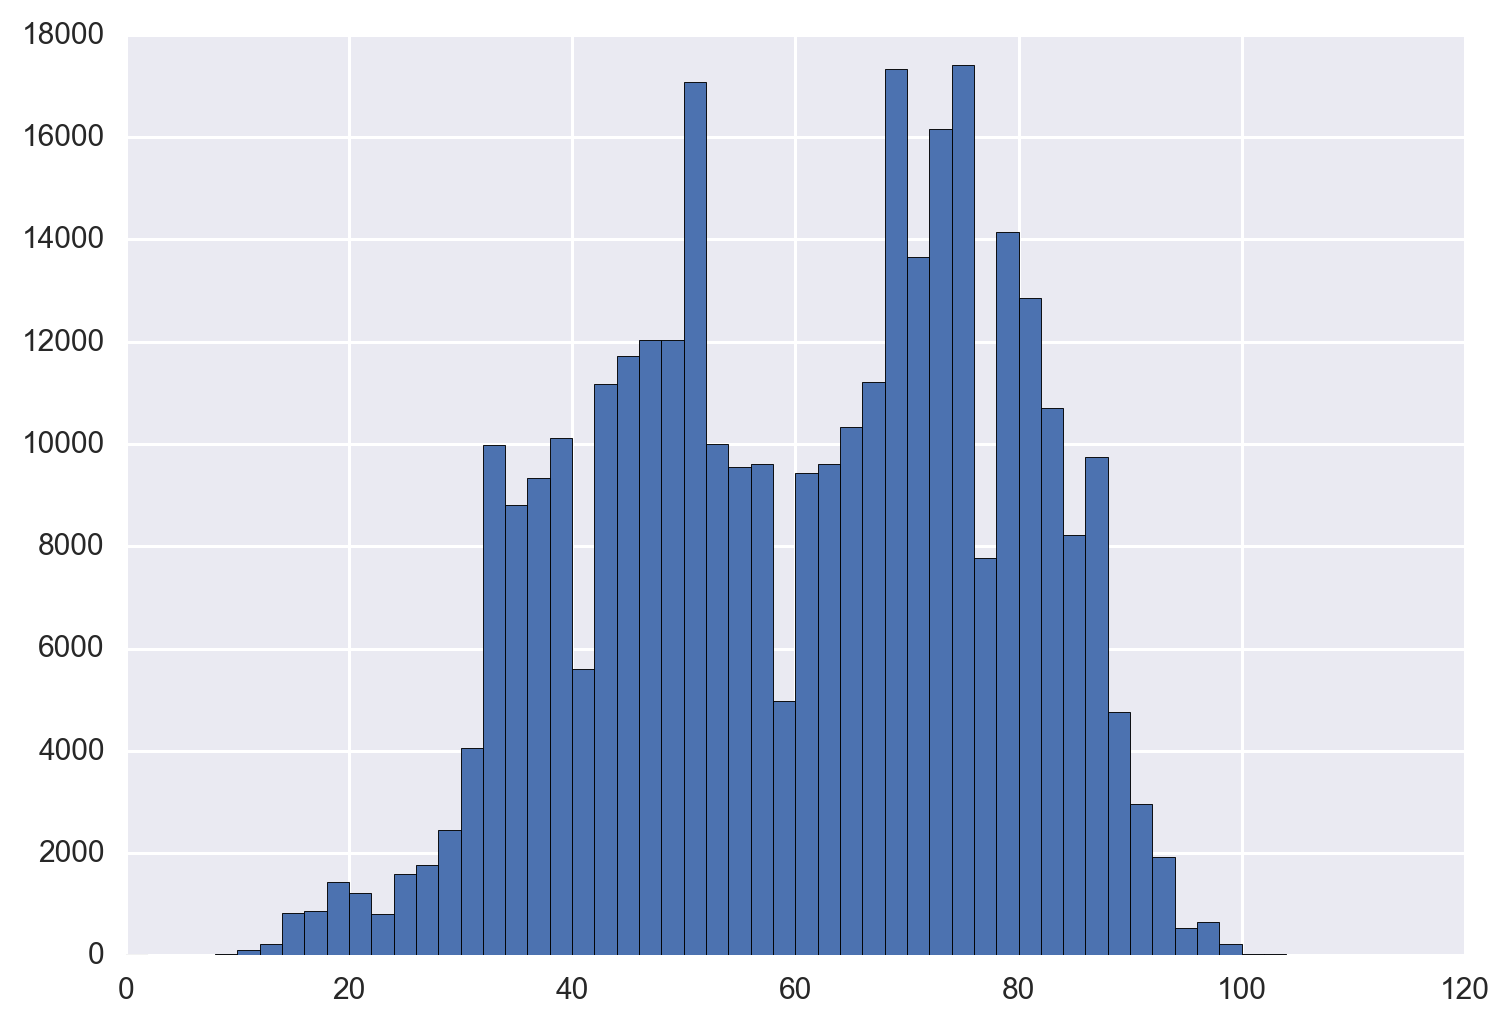

In [125]:
# Unix Timestamps have been added to weather data. Let's visualize the time series for each numeric field

myData = W1.air_temp_set_1
plt.hist(W1.air_temp_set_1[(~W1.air_temp_set_1.isnull()) & (W1.timestamp<boy19)
                                                         & (W1.timestamp>boy11)],bins=range(0,108,2))


In [95]:
# Observations:

# Overall weather Sampling rate changed 20160628
#plt.plot(W1.air_temp_set_1,'.')
    # Before 20160628: roughly 1x/hour, but often a bit more frequent. There are ~ 800 samples per month
    # Since 20160628: roughly 1x/every 5 minutes. There are ~ 10k samples per month.
    
    # So be aware that averages over rows in the dataset will be strongly biased towards the last 2.5 years of data !!!!!


In [116]:
#air_temp_set_1

#A# Quantization of temperature values: air_temp_set_1 only takes on a discrete set of values
    #plt.plot(W1.timestamp,W1.air_temp_set_1,'.')
    
    # CY 2015 appears to have quantized temperatures. Possibly not as accurate as other years?
            # Quantization appears to be about 1.8 deg jump btw accessible Temperature values in 2015. Why?
        
    # Actually similar behavior seems to occur in earlier years as well:
        #plt.plot(W1.air_temp_set_1[34000:35000],'.')
                # note that the measurement results are all "integer-ish" (within 0.1 of an integer), with a few exceptions.
    # And also in later years too:
        #plt.plot(W1.air_temp_set_1[261000:268000],'.')
            # For this one, the discretization values do not even form an arithmetic sequence.
    # regardless, CY 2015 has the largest "step size" (~1.8 deg)
        

In [118]:
#B# #myData = W1.air_temp_set_1
    #plt.hist(myData[~myData.isnull()],bins=range(0,108,2))
    # I was expecting this to look Unimodal.
    # But there are bizarre spikes and shortages
            # spikes: surprisingly high number of data points in bin 50-52
            # shortages: (not much data in bin 40-42, bin 58-60, bin 76-78
    # I suppose it's possible that this could be related to the quantization observed above. 
        # However, the discrete set of allowable values seems to evolve throughout the life of the data.
            # So it's not trivial to answer whether the up- and down- spikes in the histogram are in fact due to discretization
        # Actually, no. This is EXACTLY what is happening !!!
        
    # Okay we have solved the part of the mystery of the histogram up- and down- spikes
        # Instrument must be capturing measurements in integer degrees Celsius.
            # So the step size is 1 deg C = 1.8 deg F
            # Now also for some reason, it is sometimes erroneously inserting a "0" or a "9" into the stream
                                            # btw the decimal point and the tenths place, (when that number != zero)
                # But this error wouldn't affect our histogram at all, since it doesn't affect the integer portion 
        # The up-spikes {50-52, 68-70} are related to bins that capture more than one integer of Celsius ({10&11, 20&21} deg C)
            # {32-34} (00&01) is actually a similar up-spike, compared to the trend shown in its neighbors
                        # Similar story for {86-88} (30&31)
        # But why the down-spikes?
            # They are associated with odd integer matches (i.e. Celsius amounts divisible by 5 but not 10)
                # down-spikes at 41 F, 59 F, 77 F
            # In theory, if the true measurements are all integers Celsius, then the number of 15C should be ~= number of 16C
                    # So count(59.0) should be similar to sum(count([60.08,60.8,60.98]))
                        # But it isn't. In our data, count(59.0) is roughly half of sum(count([60.08,60.8,60.98]))
        
            

In [114]:
uAirTemp_261to270 = sorted(W1.air_temp_set_1[261000:270000].unique())
print(len(uAirTemp_261to270))
print(uAirTemp_261to270)
print([round(x,2) for x in uAirTemp_261to270])

68
[30.199999999999999, 30.920000000000002, 32.0, 33.079999999999998, 33.799999999999997, 33.979999999999997, 35.060000000000002, 35.600000000000001, 35.960000000000001, 37.039999999999999, 37.399999999999999, 37.939999999999998, 39.020000000000003, 39.200000000000003, 39.920000000000002, 41.0, 42.079999999999998, 42.799999999999997, 42.979999999999997, 44.060000000000002, 44.600000000000001, 44.960000000000001, 46.039999999999999, 46.399999999999999, 46.939999999999998, 48.020000000000003, 48.200000000000003, 48.920000000000002, 50.0, 51.079999999999998, 51.799999999999997, 51.979999999999997, 53.060000000000002, 53.600000000000001, 53.960000000000001, 55.039999999999999, 55.399999999999999, 55.939999999999998, 57.020000000000003, 57.200000000000003, 57.920000000000002, nan, 59.0, 60.079999999999998, 60.799999999999997, 60.979999999999997, 62.060000000000002, 62.600000000000001, 62.960000000000001, 64.040000000000006, 64.400000000000006, 64.939999999999998, 66.019999999999996, 66.2000

In [137]:
uAT = W1.air_temp_set_1.unique()
s_uAT = sorted(uAT)
print(uAT)
print(np.array([round(x,2) for x in s_uAT]))

# Interesting: NAN breaks sorting !!!


[  24.08   24.98   26.96   28.04   28.94   30.02   32.     30.92   33.08
   33.8    33.98   35.6    35.06   35.96   41.     42.08   44.06   42.98
   39.92   37.94   23.     21.92   21.02   19.94   19.04   17.96   17.06
   15.98   26.06   26.6    28.4    37.04   30.2    39.02   46.94   48.02
   48.92   50.     51.08   55.04   53.96   46.04   44.96   39.2    42.8
   44.6    51.98   55.94   37.4    59.     53.06   57.02   55.4    57.92
   60.8    60.08   60.98   57.2    64.94   66.92   62.06   21.2    19.4
   17.6    24.8    62.96   64.04   48.2    53.6    51.8    46.4    66.02
   68.     69.08   69.98   69.8    62.6    71.06   71.96   73.04   75.02
   64.4    66.2    73.94   71.6    75.92   80.06   82.04   80.96   78.08
   78.98   82.94   84.92   89.96   87.98   86.     77.     84.02   82.4
   78.8    80.6    75.2    73.4    87.08   84.2    91.04   91.94   89.06
   89.6    87.8    93.2    91.4    93.02   93.92   95.     96.08   96.98
   98.96   98.06   96.8   100.04  100.94  102.02   72.

In [207]:
W1.groupby('air_temp_set_1')['air_temp_set_1'].count().iloc[60:100]

air_temp_set_1
46.04    1125
46.40    9890
46.94    1249
48.02    1201
48.20    9902
48.92    1217
50.00    6865
51.08    1208
51.80    8477
51.98    1143
53.06    1214
53.60    8029
53.96    1142
55.04    1133
55.40    7584
55.94    1201
57.02    1213
57.20    7618
57.92    1119
59.00    5094
59.90       2
60.08    1158
60.80    7491
60.98    1041
62.06    1061
62.60    7613
62.96    1184
63.14       1
64.04    1105
64.40    8235
64.42      31
64.94    1275
66.02    1164
66.20    8962
66.22      67
66.92    1296
68.00    5599
68.02      31
69.08    1305
69.80    9050
Name: air_temp_set_1, dtype: int64

In [181]:
W1['frac_air_temp'] = W1.air_temp_set_1.apply(lambda x: np.nan if np.isnan(x) else ((round(x*100))%100))

C:\Users\rek\Desktop\sw\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [184]:
sorted(W1.frac_air_temp.unique())

[0.0,
 2.0,
 4.0,
 6.0,
 8.0,
 10.0,
 14.0,
 20.0,
 22.0,
 34.0,
 40.0,
 42.0,
 60.0,
 62.0,
 80.0,
 82.0,
 86.0,
 88.0,
 90.0,
 92.0,
 94.0,
 96.0,
 98.0,
 nan]

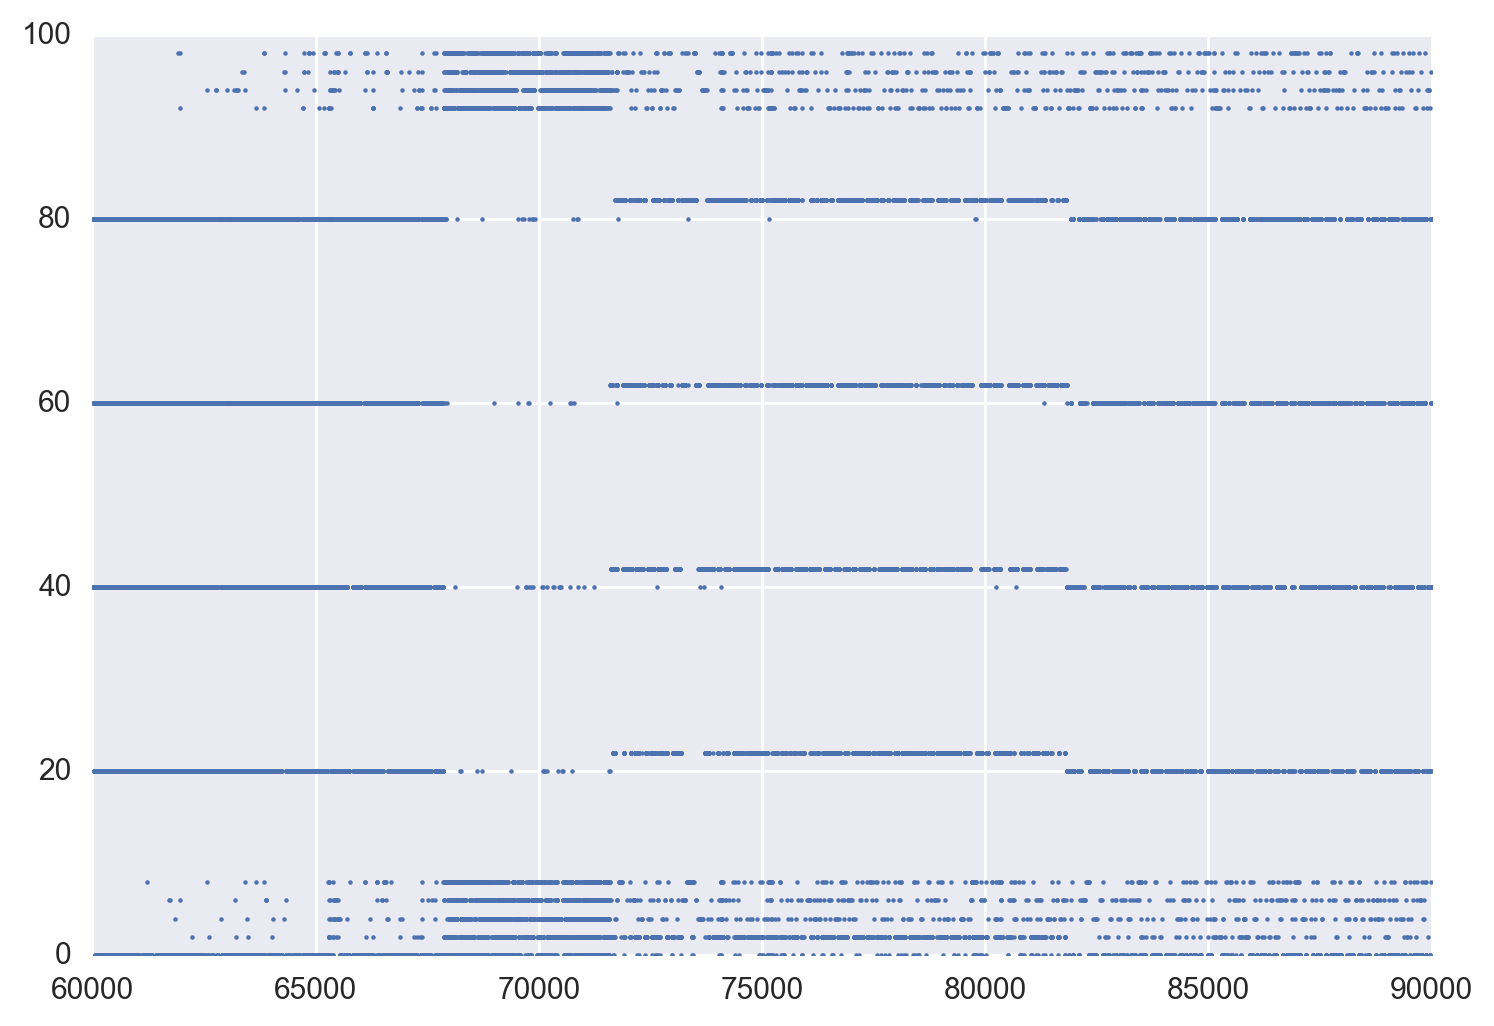

In [200]:
plt.plot(W1.frac_air_temp.iloc[60000:90000],'.',markersize=3)

#plt.plot(W1.frac_air_temp.iloc[40000:70000],'.',markersize=3)
# Not too many "0" and "9" insertions between rows 54K and 68K (Dec'14 to Mar'16)

# The extra 0.02F occurs only between ~ rows 70K and 80K

(array([  0.00000000e+00,   8.00000000e+00,   2.90000000e+01,
          1.15000000e+02,   2.28000000e+02,   2.39000000e+02,
          5.82000000e+02,   8.72000000e+02,   1.44400000e+03,
          1.21700000e+03,   8.00000000e+02,   1.59500000e+03,
          1.75800000e+03,   2.44400000e+03,   4.05700000e+03,
          2.94100000e+03,   7.04100000e+03,   8.80400000e+03,
          9.32900000e+03,   1.01250000e+04,   5.59000000e+03,
          1.11630000e+04,   1.17150000e+04,   1.20290000e+04,
          1.20390000e+04,   6.64500000e+03,   1.04380000e+04,
          9.99100000e+03,   9.54000000e+03,   9.61400000e+03,
          4.96700000e+03,   9.43000000e+03,   9.60500000e+03,
          1.03220000e+04,   1.12080000e+04,   5.47200000e+03,
          1.18650000e+04,   1.36550000e+04,   1.61610000e+04,
          1.74160000e+04,   7.76000000e+03,   1.41400000e+04,
          1.28520000e+04,   1.07020000e+04,   8.22000000e+03,
          3.55900000e+03,   6.18900000e+03,   4.75500000e+03,
        

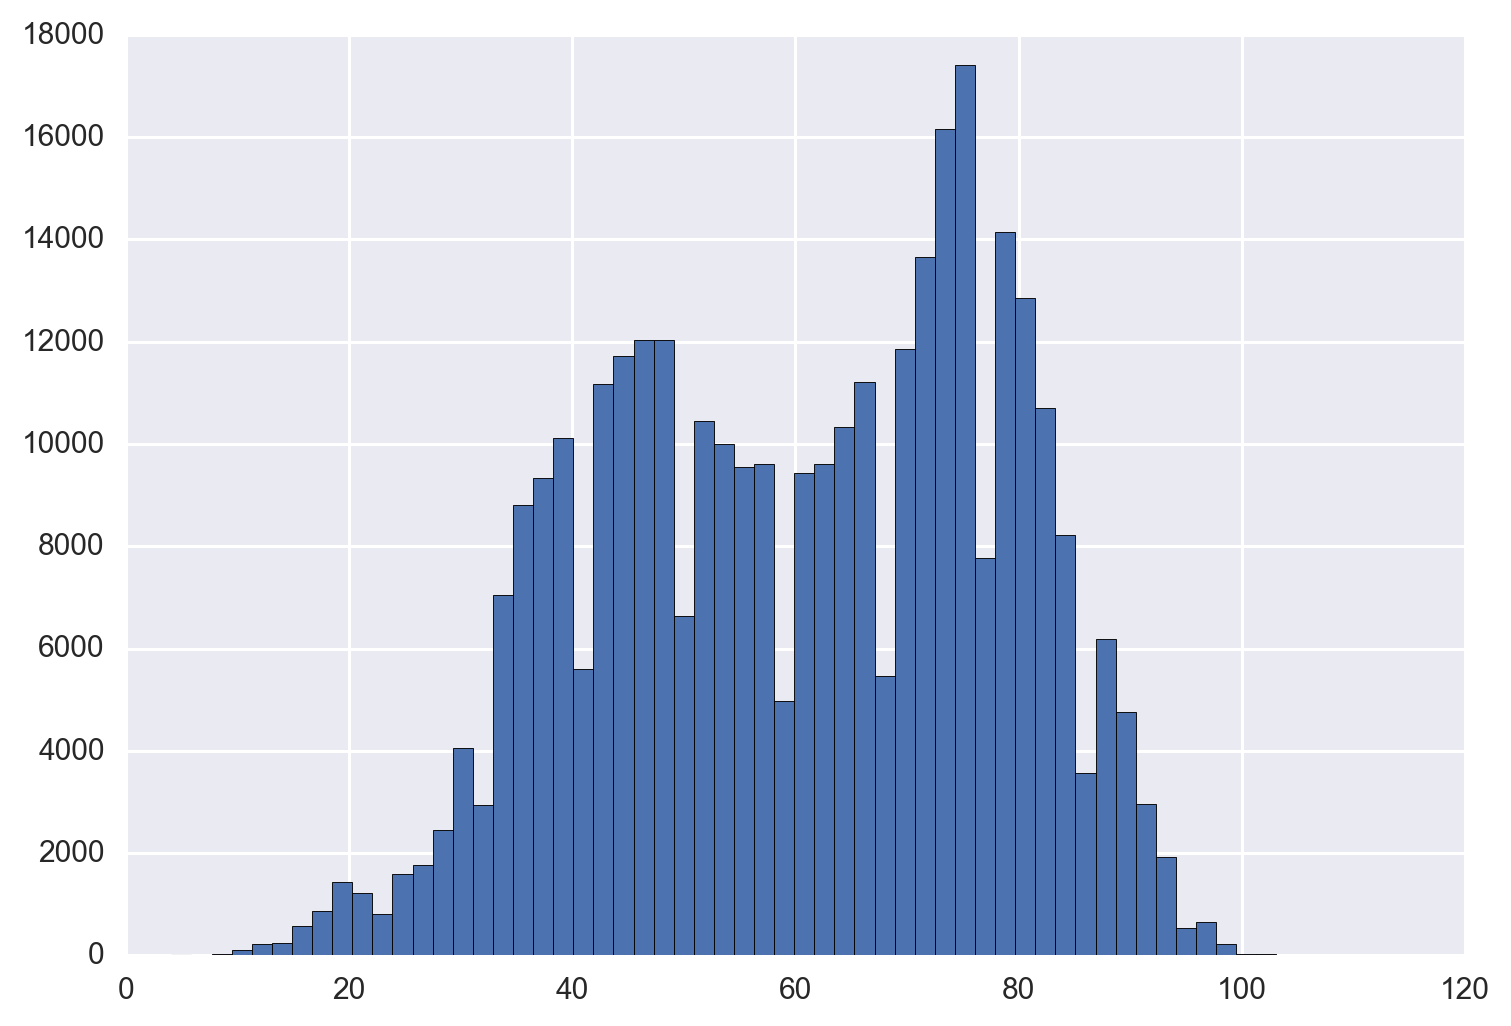

In [213]:
# Let's look at a histogram that is centered on the Celsius integers.
# This should associate the "0" and "9" insertions with the corresponding single tenths-digit version
plt.hist(W1.air_temp_set_1[(~W1.air_temp_set_1.isnull()) & (W1.timestamp>boy11) & (W1.timestamp<boy19)]
         .iloc[:],bins=[(1.8*tC + 32) for tC in np.arange(-15.5,42.5,1)])

In [206]:
# Now it looks reasonable

# Except for the down-spikes at all multiples of 5C.
    # A pattern which is evident just from inspecting the raw counts:
    # W1.groupby('air_temp_set_1')['air_temp_set_1'].count().iloc[60:100]   # e.g.
    
# Interesting that the distribution is skewed, I didn't expect that.
    # But it seems consistent from year-to-year: mode of air_temp data is in the 70s Fahrenheit
        # This is not an artifact of the inconsistent sampling rate: mode is in the 70s for any given calendar year
        # although the mean is substantially lower: 
                # true mean should be about 59 F
        # and the mean measurement is affected by uneven sampling
                # mean of air_temp data is 60 (if averaged by row)
                # but this is pulled upward by uneven sampling
                    # e.g. mean(air_temp_data), averaged over rows, just in CY 2016, is 64 F
                    # most other years, where sampling is close to constant: mean(air_temp) = 59

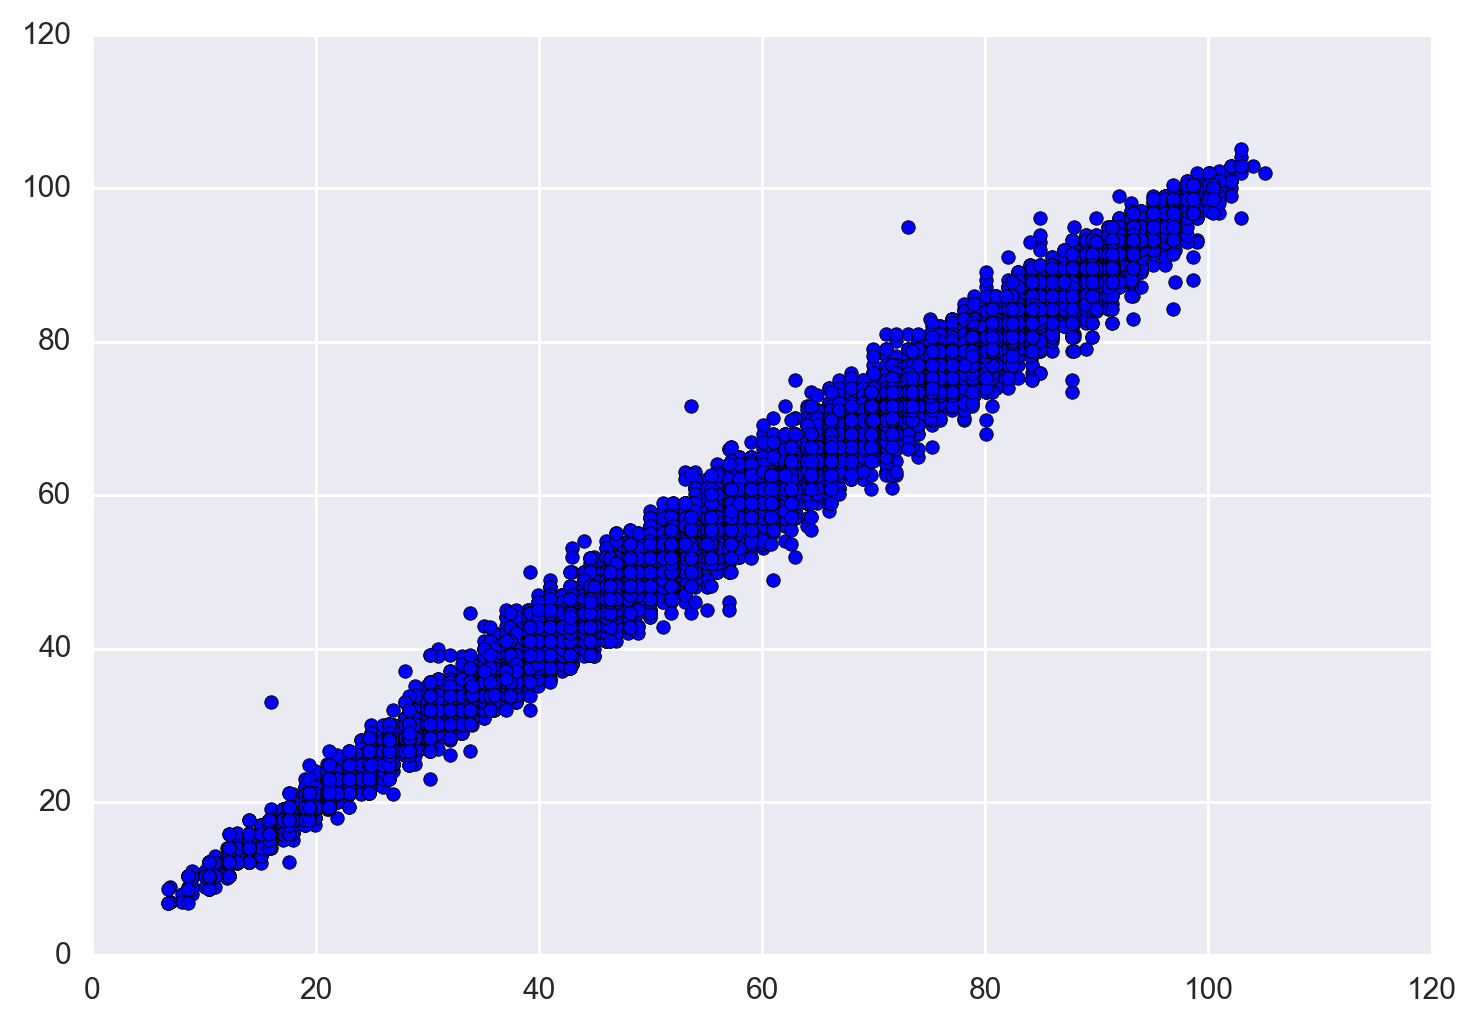

In [224]:
# Okay that's enough about the unconditional distribution of air_temp

# Now let's look at autocorrelation for the unevenly sampled set
lag=1
plt.scatter(W1.air_temp_set_1.iloc[:(-lag or None)],W1.air_temp_set_1.iloc[lag:])
# A few points seem surprisingly far off the line (3 points where temp climb exceeds +15 deg in one step:
        # jump points:
            #27039 (time step gap of 10 hours, from early morning to mid-afternoon)
            #44257 (8-hour time gap btw meas, again from early morning to mid-afternoon)
            #56891 (no time gap, just 1 hr btw meas: 20170315
                    # low-pressure, warms up 18deg in one hour, while getting much windier (gusts > 20mph for rest of day)
            
        

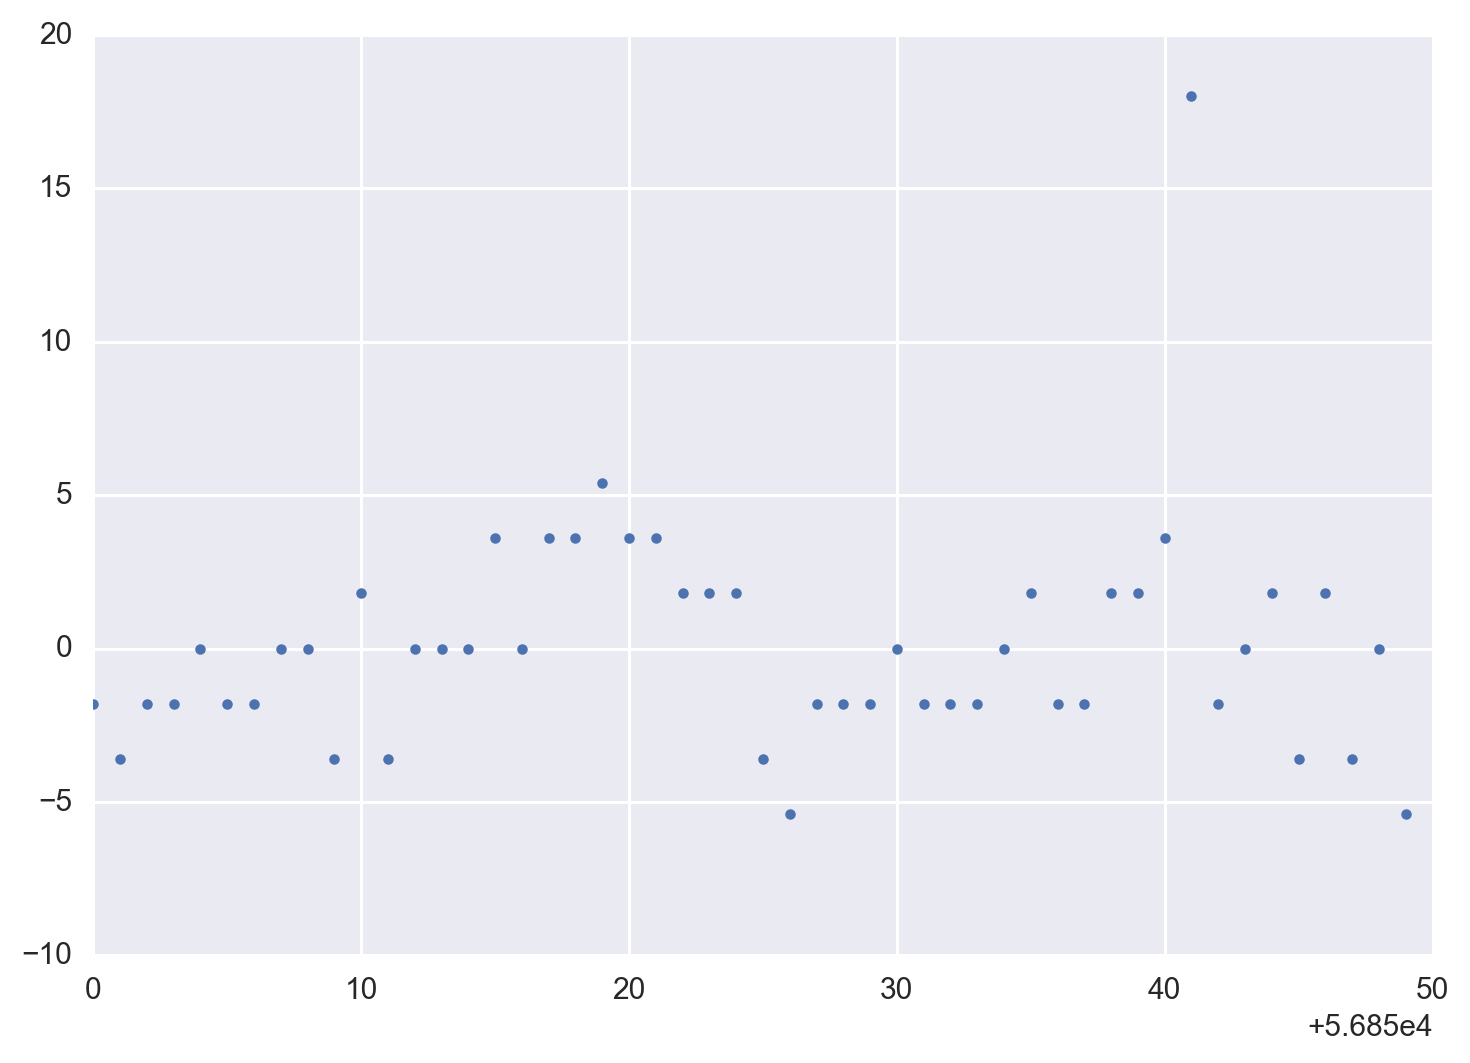

In [243]:
dTemp = W1.air_temp_set_1.diff().iloc[56850:56900]
plt.plot(dTemp,'.')

In [201]:
# We could investigate this all further. But not especially relevant.
# Takeaways: temperatures have typical uncertainties of at least 1 deg. 

# There may be a bias, due to the collection site at DCA being in a warm spot for the DC region.
# The real issue here would be predicting off real-time data collected from different sensors than the training data.
    # There is likely a bias due to that.

In [219]:
W1.air_temp_set_1[(~W1.air_temp_set_1.isnull()) & (W1.timestamp>boy11) & (W1.timestamp<boy15)].iloc[:].mean()

59.05848756764126

In [110]:
W1.Date_Time.iloc[268000]

'03/28/2018 07:30 EDT'

In [113]:
round((53.6-32)/1.8,2)

12.0

In [106]:
round([464.345,46.34535],2)

TypeError: a float is required

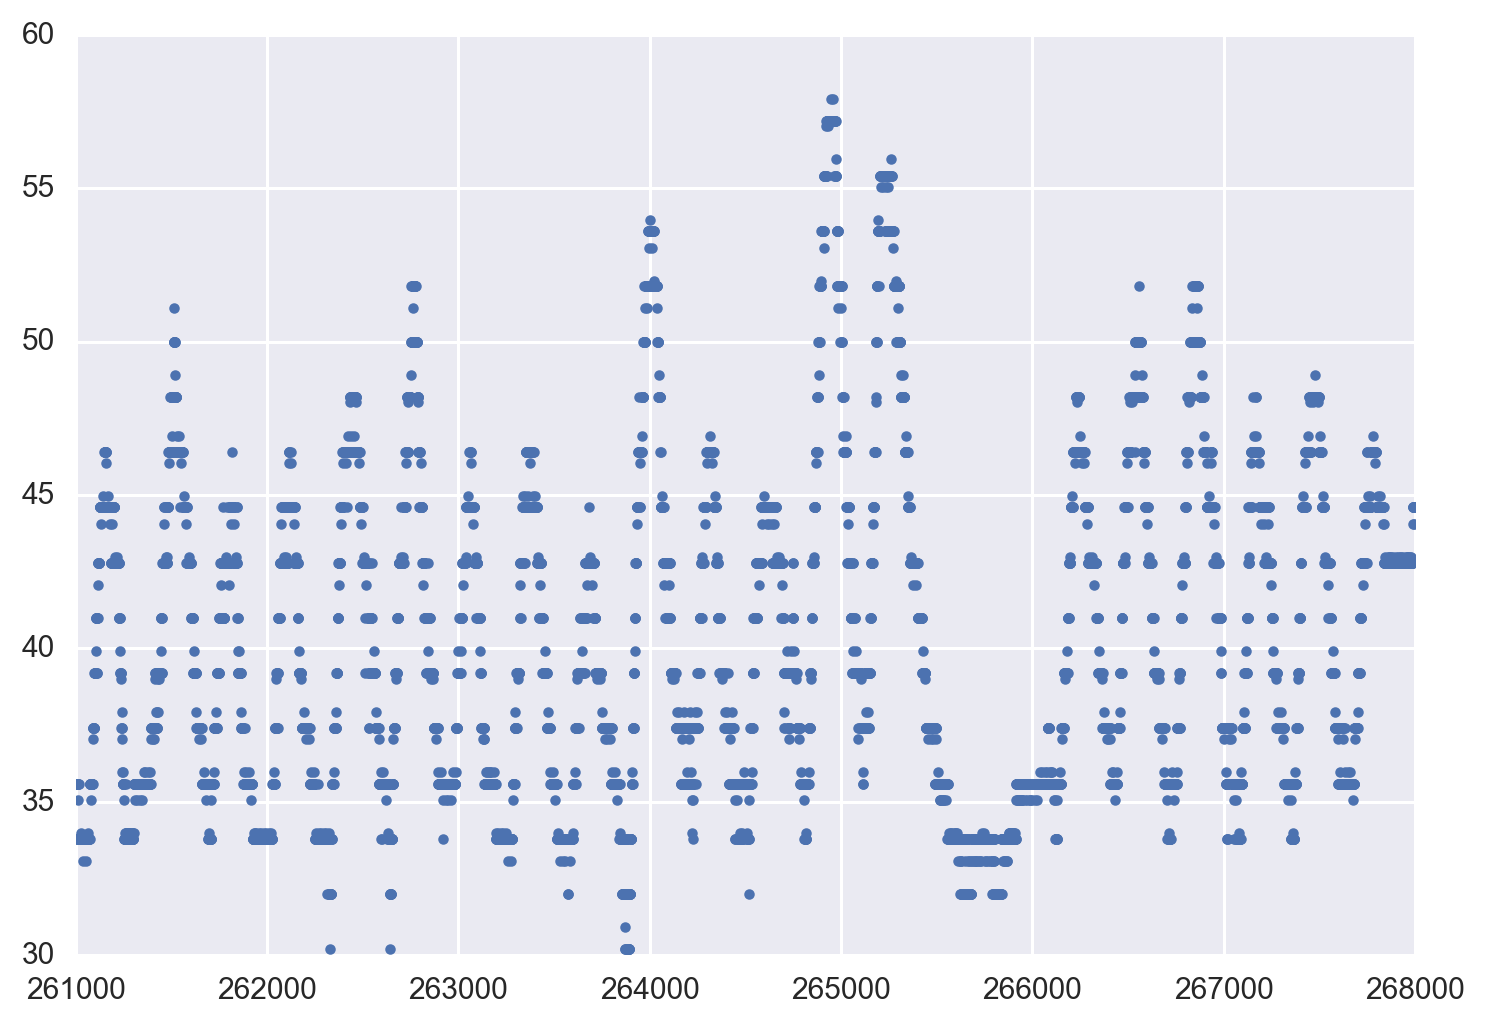

In [99]:
plt.plot(W1.air_temp_set_1.iloc[261000:268000],'.')

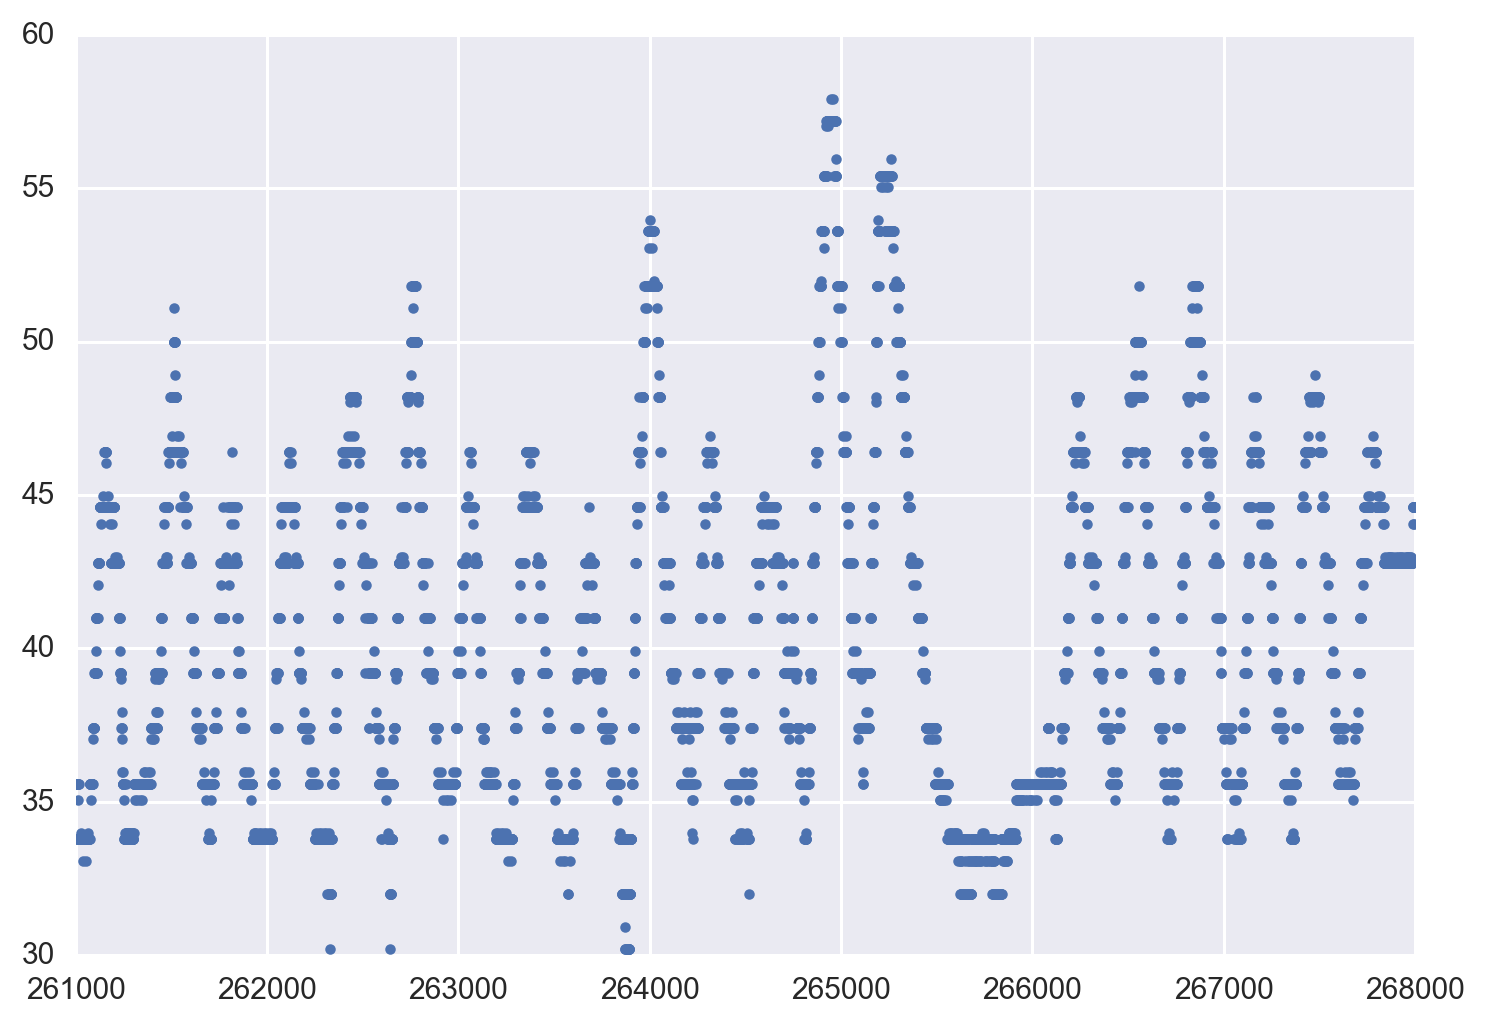

In [94]:
plt.hist(myData[~myData.isnull()],bins=range(0,108,2))

In [82]:
W1.Date_Time.iloc[127000:127004]

127000    12/27/2016 03:05 EST
127001    12/27/2016 03:10 EST
127002    12/27/2016 03:15 EST
127003    12/27/2016 03:20 EST
Name: Date_Time, dtype: object

In [60]:
tStr = '%m/%d/%Y %H:%M'
testStamp = '01/01/2010 00:00 EST'
print(time.mktime(datetime.datetime.strptime('01/01/2010 00:00','%m/%d/%Y %H:%M').timetuple()))
#print(time.mktime(datetime.datetime.strptime('01/01/2010 00:00 EST','%m/%d/%Y %H:%M').timetuple()))
print(time.mktime(datetime.datetime.strptime('01/01/2010 00:00 EST','%m/%d/%Y %H:%M EST').timetuple()))
print(time.mktime(datetime.datetime.strptime('01/01/2010 00:00','%m/%d/%Y %H:%M %Z').timetuple()))

1262322000.0
1262322000.0


ValueError: time data '01/01/2010 00:00' does not match format '%m/%d/%Y %H:%M %Z'

In [61]:
tStr = '%Y-%m-%d %H:%M:%S'
idata = DF['Start date'].iloc[:80000]
%timeit odata1 = idata.apply(lambda x: time.mktime(datetime.datetime.strptime(x,tStr).timetuple()))    # pandas Series
%timeit odata2 = [time.mktime(datetime.datetime.strptime(x,tStr).timetuple()) for x in idata]          # list

# 80000 conversions per second: it would take 10 minutes to convert 45M timestamps

1 loop, best of 3: 1.8 s per loop
1 loop, best of 3: 1.74 s per loop


In [ ]:
22660327-22641886
# DeDuping has removed 18441 rows, but there are 240 more that overlap
    # some of the station names changed, so dedupe didn't catch them!

In [ ]:
DF.tail()

In [ ]:
# indices have not been readjusted 

In [ ]:
for j in range(len(DF)-1):
    if (not(j%1000000)):
        print(j)
    if (not((DF['Start date'][j] <= DF['Start date'][j+1]))):
        print('Broken')
        print(j)
        break

In [ ]:
DF.iloc[22482791:22482801]

In [ ]:
DF.iloc[22501433:22501443]

In [ ]:
nameChanges = [31232,31040,31090,32215,31071,31064]
for j in range(22482793,22497834):   #22501474
    if (not(j%5000)):
        pass#print(j)
    if (not(all(DF.iloc[j]==DF.iloc[j+18681]))):
        (ssn,esn)=(DF.iloc[j]['Start station number'],DF.iloc[j]['End station number'])
        if (not(ssn in nameChanges) and not(esn in nameChanges)):
            print((j,DF.iloc[j]['Start station number'],DF.iloc[j]['End station number']))

In [ ]:
offset=18681
for j in range(22482793,22501474):   #22501474
    if (not(j%5000)):
        pass#print(j)
    if (not(all(DF.iloc[j]==DF.iloc[j+offset]))):
        (ssn,esn)=(DF.iloc[j]['Start station number'],DF.iloc[j]['End station number'])
        if (not(ssn in nameChanges) and not(esn in nameChanges)):
            print((j,DF.iloc[j+offset]['Start station number'],DF.iloc[j+offset]['End station number']))

In [32]:
df = pd.DataFrame({
        'A':list('abcdef'),
         'B':[4,np.nan,np.nan,5,5,4],
         'C':[7,8,9,4,2,3],
         'D':[1,3,5,7,1,0],
         'E':[5,3,6,9,2,4],
         'F':list('aaabbb')
})

In [33]:
df

,A,B,C,D,E,F
0,a,4.0,7,1,5,a
1,b,NaN,8,3,3,a
2,c,NaN,9,5,6,a
3,d,5.0,4,7,9,b
4,e,5.0,2,1,2,b
5,f,4.0,3,0,4,b


In [40]:
df1 = df.describe(include='all')
df1.loc['dtype'] = df.dtypes
df1.loc['size'] = len(df)
df1.loc['% count'] = df.isnull().mean()

In [41]:
df1

,A,B,C,D,E,F
count,6,4,6,6,6,6
unique,6,NaN,NaN,NaN,NaN,2
top,f,NaN,NaN,NaN,NaN,b
freq,1,NaN,NaN,NaN,NaN,3
mean,NaN,4.5,5.5,2.83333,4.83333,NaN
std,NaN,0.57735,2.88097,2.71416,2.48328,NaN
min,NaN,4,2,0,2,NaN
25%,NaN,NaN,3.25,1,3.25,NaN
50%,NaN,NaN,5.5,2,4.5,NaN
75%,NaN,NaN,7.75,4.5,5.75,NaN


In [42]:
pd.__version__

u'0.18.1'

In [ ]:
# Some rows that were part of the original TripHistory_2_DB function:

    
    [cfm_F,cfm_B] = get_cabiFieldMatcher()
    (yearsCovered,monthsCovered) = read_TH_zipLogFile(zipsDir,dbName)
    cabiZipFiles = filter(lambda x: x.endswith('-capitalbikeshare-tripdata.zip'),os.listdir(zipsDir))
    numNewRows=0
    for ff in cabiZipFiles:
        y = ff[:4]
        if (not(y.isdigit())):
            print('Unable to parse file name format: %s' % ff)
        elif (y in yearsCovered):
            print('Skipping file %s. Already in database' % ff)
        elif (y not in yearsCovered):
            print('reading file: %s' % ff)
            zf=zipfile.ZipFile(os.path.join(zipsDir,ff))
            zipContents = filter(lambda x: x.endswith('.csv'),zf.namelist())
            for csvfilename in zipContents:
                print('    reading CSV: %s' % csvfilename)
                th = pd.read_csv(zf.open(csvfilename))
                print('      NumRows: %d' % len(th))
                numNewRows += len(th)
                cols = th.columns
                for col0 in cols:
                    col = re.sub('[^a-z]+', '', col0.lower())
                    if (col in cfm_B):
                        FN = cfm_B[col]
                        if FN in fN_TH():
                            print('        Processing field: %s' % FN)
                            th = th.rename(columns = {col0:FN})
                            th[FN] = reformatCabiField(th[FN],FN)
                th = th[fN_TH()]
                th.loc[:,'startHour'] = np.floor(th['startTime']/3600.0).astype('int64')
                th.loc[:,'endHour'] = np.floor(th['endTime']/3600.0).astype('int64')
                rek_writeSQL(dbName,tableName,th,'a')
    print('Total num rows added to database: %d' % numNewRows)
